# Machine Learning: Logistic Regression  


In this notebook, I will perform machine learning on my dataset. Specifically, I will do logistic regression as my task for the dataset is to perform binary classification. 

To begin with I have to drop the ID columns so that the machine learning algorithm will not memorize the answer based on the ID number. Additionally, I will encode the 1s and 0s that are not already classified as binary. Then create a weight so that the fewer instances of 1s will be looked at with the same weight as the many instances of 0s. 

**Data Preparation**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import math
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('train.csv')
df=data.drop(columns=['ID'])
df.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
label_encoder = LabelEncoder()

# encode non-binary values in feature columns
for column in df.columns:
    if df[column].nunique() > 2:  
        df[column] = label_encoder.fit_transform(df[column])

In [15]:
# Class weights
#class_counts = df['TARGET'].value_counts()
#class_weights = {0: 1.0, 1: class_counts[0] / class_counts[1]}

In [16]:
class_counts = df['TARGET'].value_counts()
class_weights = {0: 1.0, 1: 0.8 * (class_counts[0] / class_counts[1])}

**Logistic Regression**

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop(columns=['TARGET'])
y = df['TARGET']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# logistic regression model
model = LogisticRegression(random_state=42, class_weight=class_weights)  # 'class_weight' helps with class imbalance

# Train model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

/home/emily4664/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


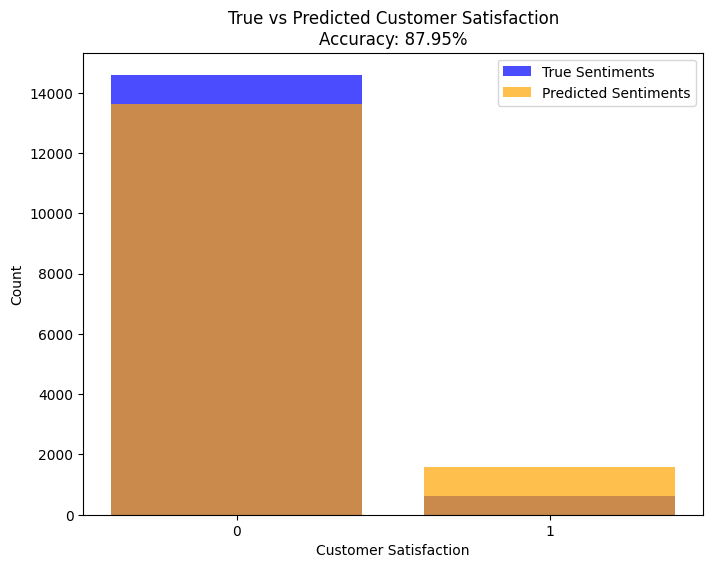

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(np.arange(len(conf_matrix)), conf_matrix.sum(axis=1), color='blue', alpha=0.7, label='True Sentiments')
ax.bar(np.arange(len(conf_matrix)), conf_matrix.sum(axis=0), color='orange', alpha=0.7, label='Predicted Sentiments')

ax.set_xticks(np.arange(len(conf_matrix)))
ax.set_xticklabels(sorted(y_test.unique()))  
ax.set_xlabel('Customer Satisfaction')
ax.set_ylabel('Count')
ax.set_title(f'True vs Predicted Customer Satisfaction\nAccuracy: {accuracy * 100:.2f}%')
ax.legend()

plt.show()


I used a confusion matrix to evaluated the performance of the logictic regression model. Here, you can see that the model performed pretty well with a 87.95% accuracy. It underpredicted the 0s and overpredicted the 1s but not by a large margin. 

Accuracy: 0.8795053933175481
Confusion Matrix:
[[13200  1397]
 [  435   172]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.94     14597
           1       0.11      0.28      0.16       607

    accuracy                           0.88     15204
   macro avg       0.54      0.59      0.55     15204
weighted avg       0.93      0.88      0.90     15204

F1 Score Table:
              precision    recall  f1-score
Class 0        0.968097  0.904295  0.935109
Class 1        0.109624  0.283361  0.158088
accuracy       0.879505  0.879505  0.879505
macro avg      0.538860  0.593828  0.546599
weighted avg   0.933823  0.879505  0.904088


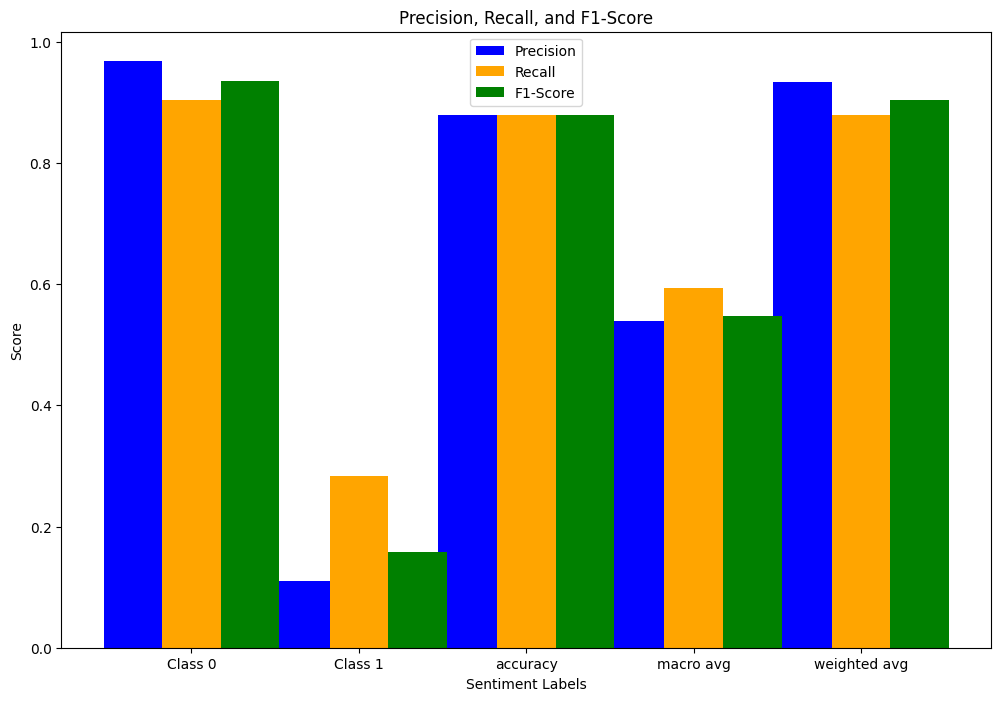

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)

df_class_report = pd.DataFrame(class_report).transpose()

print("F1 Score Table:")
print(df_class_report[['precision', 'recall', 'f1-score']])

# F1
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.35
index = np.arange(len(df_class_report))
bar1 = ax.bar(index, df_class_report['precision'], bar_width, label='Precision', color='blue')
bar2 = ax.bar(index + bar_width, df_class_report['recall'], bar_width, label='Recall', color='orange')
bar3 = ax.bar(index + 2 * bar_width, df_class_report['f1-score'], bar_width, label='F1-Score', color='green')

ax.set_xticks(index + bar_width)
ax.set_xticklabels(df_class_report.index)
ax.set_xlabel('Sentiment Labels')
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1-Score')
ax.legend()

plt.show()


For the prediction of class 0, the model performed well as the precision, recall, and f1 score are all relatively close to 1. The prediction of class 1 however is not as great as the scores of all three a much lower. The score of the recall is the highest at about 0.28, which the other two are below 0.2 which indicates that the model is good at finding the actual instances where the target would have been 1. The lowest performance score was for precision, which indicates that the model is makes a lot of false positive predictions.   

The macro averages indicate that the model is performing well but not great. The weighted average is high, however, which means that the model is performing well on the large and small classes.

**Logistic Regression pt.2**  

Here, I am using the logistic regression machine learning and training it on only the top correlated feature columns to see if it would change the accuracy and such. 

In [39]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['TARGET'].abs()

sorted_correlations = correlation_with_target.sort_values(ascending=False)

In [40]:
top_correlated_features = sorted_correlations.head(11).index
df_top_correlated = df[top_correlated_features]

In [44]:
# top correlated columns
X_top_correlated = df_top_correlated
y_top_correlated = df['TARGET']  # Assuming the target variable is the same for both datasets

# Split training and testing sets
X_train_top_correlated, X_test_top_correlated, y_train_top_correlated, y_test_top_correlated = train_test_split(X_top_correlated, y_top_correlated, test_size=0.2, random_state=42)

# logistic regression for the top correlated columns
model_top_correlated = LogisticRegression(random_state=42)

# Train 
model_top_correlated.fit(X_train_top_correlated, y_train_top_correlated)

# predictions
y_pred_top_correlated = model_top_correlated.predict(X_test_top_correlated)

# Evaluate
accuracy_top_correlated = accuracy_score(y_test_top_correlated, y_pred_top_correlated)
conf_matrix_top_correlated = confusion_matrix(y_test_top_correlated, y_pred_top_correlated)
classification_rep_top_correlated = classification_report(y_test_top_correlated, y_pred_top_correlated)

print(f"\nAccuracy (Top Correlated Model): {accuracy_top_correlated}")
print(f"Confusion Matrix (Top Correlated Model):\n{conf_matrix_top_correlated}")
print(f"Classification Report (Top Correlated Model):\n{classification_rep_top_correlated}")



Accuracy (Top Correlated Model): 1.0
Confusion Matrix (Top Correlated Model):
[[14597     0]
 [    0   607]]
Classification Report (Top Correlated Model):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14597
           1       1.00      1.00      1.00       607

    accuracy                           1.00     15204
   macro avg       1.00      1.00      1.00     15204
weighted avg       1.00      1.00      1.00     15204



/home/emily4664/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
example_counter = 0
for true_label, predicted_label in zip(y_test_top_correlated, y_pred_top_correlated):
    print(f'True Label: {true_label}, Predicted Label: {predicted_label}')
    example_counter += 1
    if example_counter >= 50:
        break


True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 1, Predicted Label: 1
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0,

Training on only the top correlated features resulted in the 100% accuracy, which leads me to believe that the model became overfitted to these columns. 

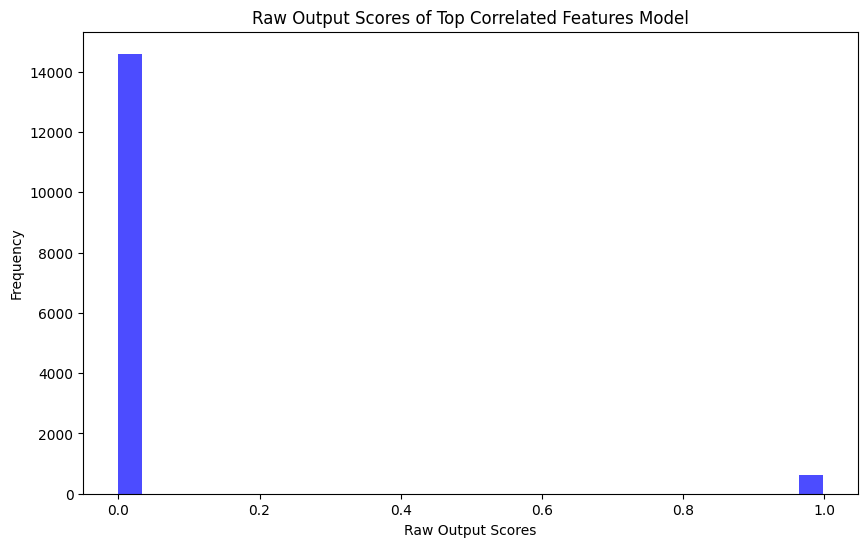

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get raw output/probability scores from the model
y_scores_top_correlated = model_top_correlated.predict_proba(X_test_top_correlated)[:, 1]

plt.figure(figsize=(10, 6))
plt.hist(y_scores_top_correlated, bins=30, color='blue', alpha=0.7)
plt.title('Raw Output Scores of Top Correlated Features Model')
plt.xlabel('Raw Output Scores')
plt.ylabel('Frequency')
plt.show()

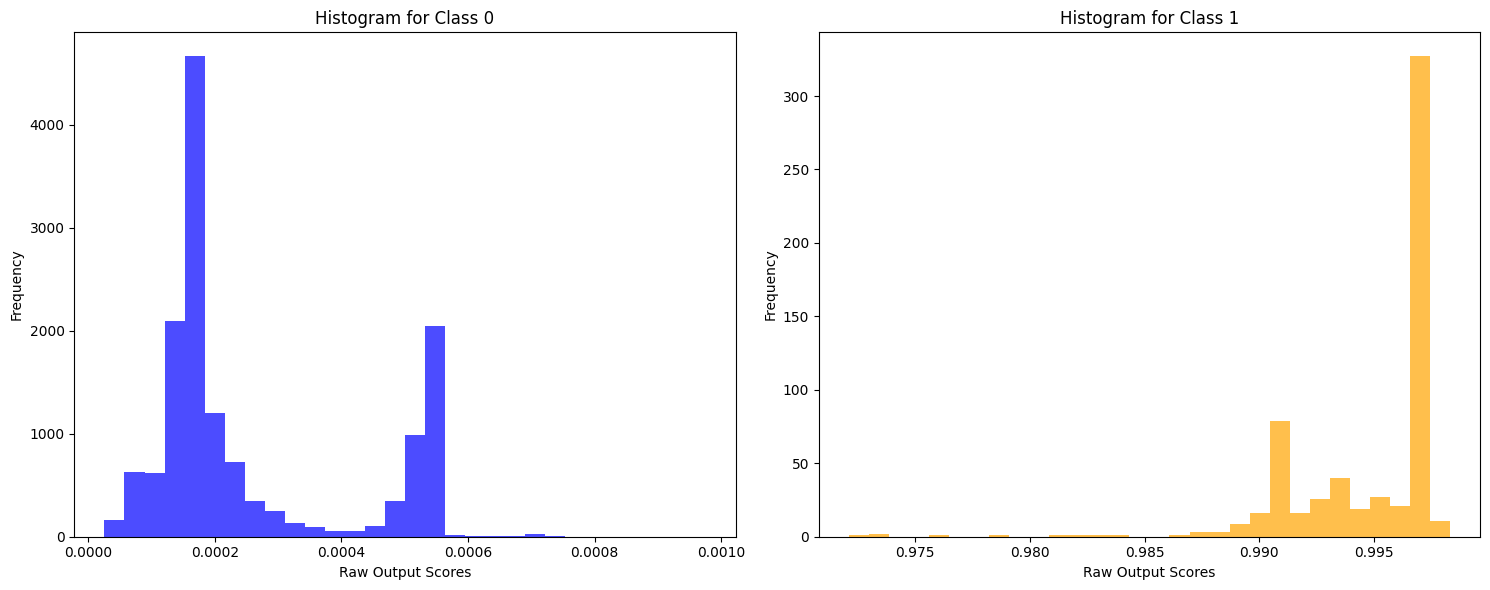

In [50]:
import matplotlib.pyplot as plt

y_scores_top_correlated = model_top_correlated.predict_proba(X_test_top_correlated)[:, 1]

plt.figure(figsize=(15, 6))

# Histogram for Class 0
plt.subplot(1, 2, 1)
plt.hist(y_scores_top_correlated[y_test_top_correlated == 0], bins=30, color='blue', alpha=0.7)
plt.title('Histogram for Class 0')
plt.xlabel('Raw Output Scores')
plt.ylabel('Frequency')

# Histogram for Class 1
plt.subplot(1, 2, 2)
plt.hist(y_scores_top_correlated[y_test_top_correlated == 1], bins=30, color='orange', alpha=0.7)
plt.title('Histogram for Class 1')
plt.xlabel('Raw Output Scores')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Looking at the raw output histograms for class 0 and class 1 shows that the algorithm porbably, indeed overfitted to the feature columns, because all of the probability instances are clumped up around 0-0.0008 and 0.950-1 which are miniscule intervals. However, these histograms also mean that there is a low probability of class 0 belonging to the positive class of 1 and a high probability of class 1 belonging to 1, which was what I was aiming for. 



One hot encode categorical variables with more than 2 classes

Change the class weight for imbalance accordingly.

check raw output for first model 

check the model 2 on test set to see if the model is running well. 